# Python progress report

- toc:false
- branch: master
- badges: true
- comments: false
- categories: [python]
- hide: true

This report provides class progress statistics for the Getting Started section of the [Computational Physics course KD5081](https://nu-cem.github.io/CompPhys/) at Northumbria University. 

## Friendly request

If you use this notebook as a basis for your own work please [let me know](mailto:l.whalley@northumbria.ac.uk) - hearing from people who find what I've written about useful encourages me to spend more time in the future documenting my ideas/workflows.

## Student workflow

From a student's point of view the process is:

1. Create a Github account (it is free).
2. Go to the course [issues page](https://github.com/NU-CEM/CompPhys/) and click on “New Issue”.
3. Next to “Python basics checklist” click “Get started”.
4. **Without** editing any text, click “Submit new issue”. This will generate an issue with a pre-defined checklist.
5. Work through the tutorials and questions for the relevant section of the course (part one - “Getting Started”) and tick off the items on the checklist accordingly.

## Issue template

Steps 2 to 4 in the student workflow above enable students to generate the checklist via a Github issue template which can be found [here](https://github.com/NU-CEM/CompPhys/blob/master/.github/ISSUE_TEMPLATE/python-basics-checklist.md).

## Automation

This notebook is hosted on Github and automatically runs after every commit, and once an hour. Automation is via a [Github action](https://github.com/NU-CEM/CompPhys/blob/master/.github/workflows/RunNotebook.yml). This workflow was designed following the clear advice given by the [Living with machines project](https://github.com/Living-with-machines/github_stats_report).

## Summary plot

The end result of this notebook is a class progress summary plot, which can also be found on [this page](https://nu-cem.github.io/CompPhys/2021/08/02/Issues.html).

## Adapting this for a different course / checklist

If you want to adapt this workflow for your own Github-hosted course repository, the following should work (please let me know if it does or does not!):

1) Adapt the [issue template]((https://github.com/NU-CEM/CompPhys/blob/master/.github/ISSUE_TEMPLATE/python-basics-checklist.md)) with a checklist for your own curriculum:

- The empty check boxes `- [ ]` need to be immediately followed by the checklist item e.g. "Open and save a Jupyter Notebook" and then a newline, or the regex below will not work. 
- If you change the issue label (currently "python_checklist") you will need to update this notebook accordingly (see below).  
    
2) Upload the issue template to your repository folder `.github/ISSUE_TEMPLATE/`.     

3) Copy this notebook across to your course repository. You will need to edit the values in the cell below `Course specific inputs`.  

4) Copy the [Github action](https://github.com/NU-CEM/CompPhys/blob/master/.github/workflows/RunNotebook.yml) to your repository folder `.github/workflows/`. You will need to update two fields at a minimum: the [author name](https://github.com/NU-CEM/CompPhys/blob/1a8c1247cc969416daf26181d0f8816b2de8982f/.github/workflows/RunNotebook.yml#L31) and the [path to this notebook](https://github.com/NU-CEM/CompPhys/blob/1a8c1247cc969416daf26181d0f8816b2de8982f/.github/workflows/RunNotebook.yml#L27).



## Course specific inputs


In [1]:
course_repo = "nu-cem/CompPhys"
issue_template_path = '.github/ISSUE_TEMPLATE/python-basics-checklist.md'
issue_template_label = "python_checklist"
output_file_path = "../images/progress_report.png"

## Prepare system
Install libraries, get Github authentication token and create tasks list.

In [2]:
from github import Github
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import os
import re

In [3]:
load_dotenv()
GH_TOKEN = os.getenv("GH_TOKEN")  # this is needed to interact with the Github API

## Access course repo

In [4]:
g = Github(GH_TOKEN)

In [5]:
repo = g.get_repo(course_repo)

## Get checkbox items from the issue template

In [6]:
issue_template_content = repo.get_contents(issue_template_path).decoded_content.decode()

In [7]:
tasks = re.findall(r'\[ ] (.*)\n', issue_template_content)

## Retrieve and parse raised issue information

In [8]:
checklist_issues = repo.get_issues(labels=[issue_template_label])

In [9]:
totals = [0]*len(tasks)
issue_count = 0

for issue in checklist_issues:
    issue_count += 1
    body = issue.body
    for i,task in enumerate(tasks):
        if task in body:
            splits = body.split(task,maxsplit=2)
            if splits[0][-4:-1] == '[x]':
                totals[i] += 1
        else:
            print("problem: '{}' not in string in issue # {}".format(task, issue.number))

## Plot results

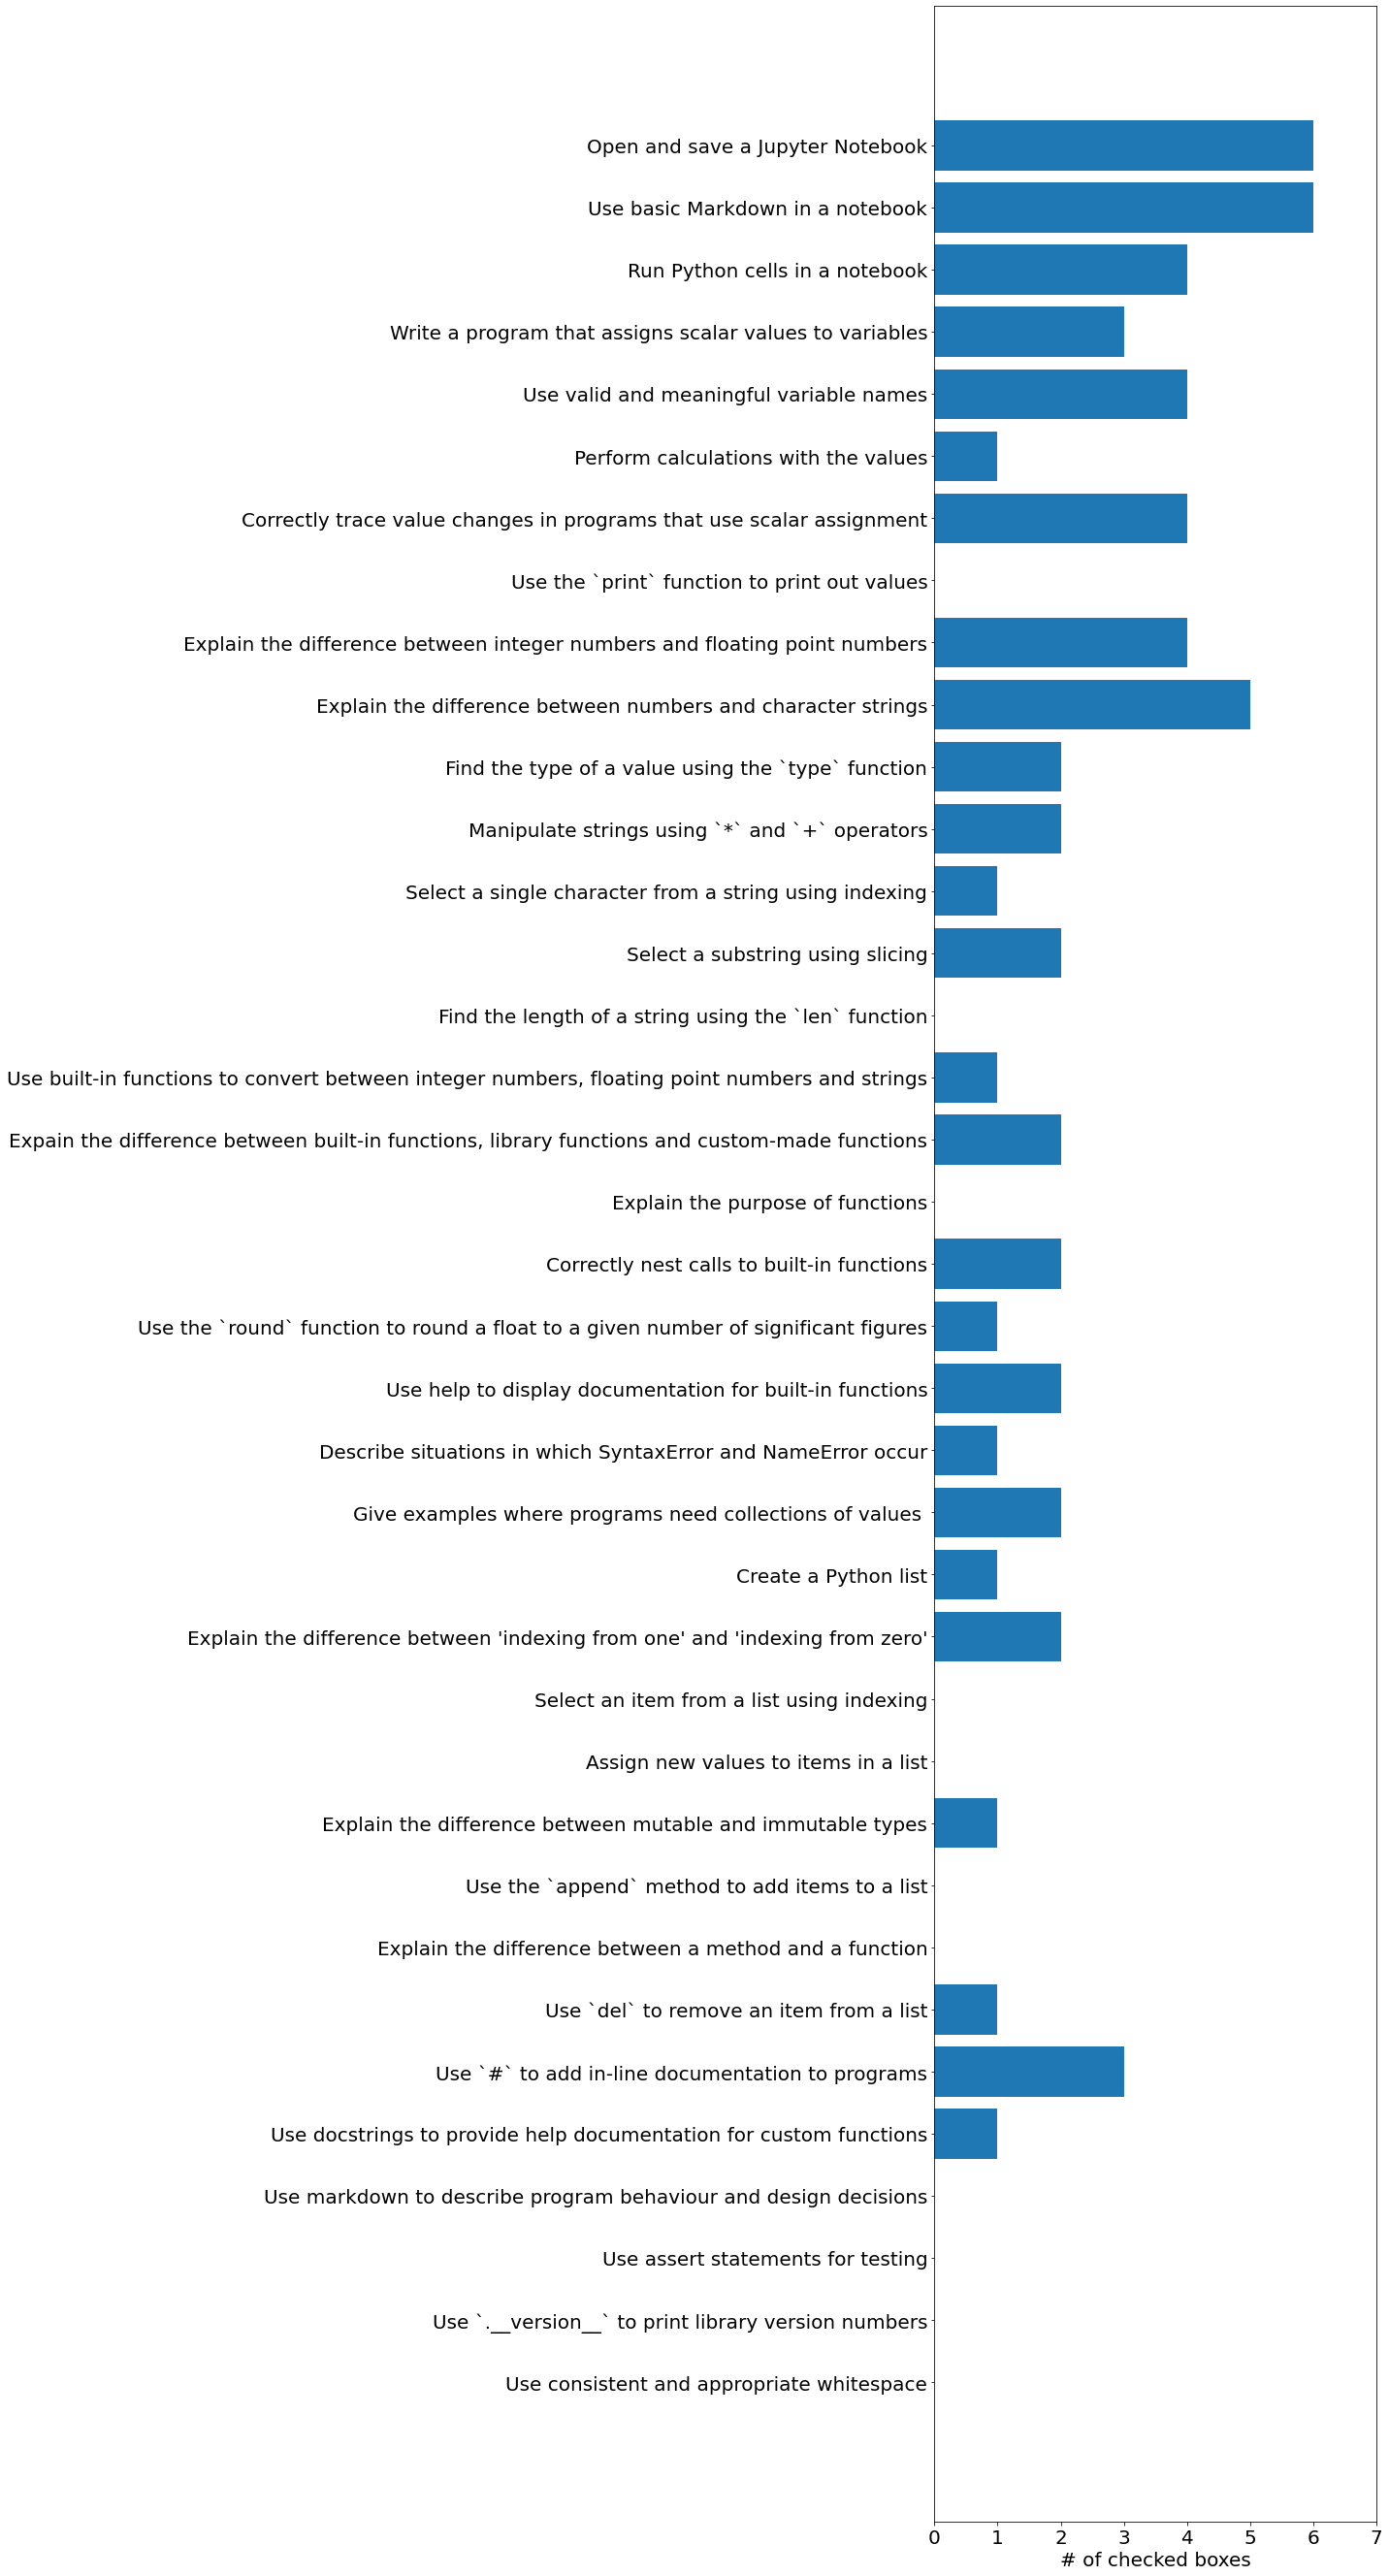

In [10]:
fig, ax = plt.subplots(1,1,figsize=(20,len(tasks)))

ax.barh(np.arange(len(tasks)),totals, align='center')
ax.set_yticks(np.arange(len(tasks)))
ax.set_xticks(np.arange(issue_count+0.1))
ax.set_yticklabels(tasks)
ax.invert_yaxis()
ax.set_xlabel('# of checked boxes')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.tight_layout()
plt.savefig(output_file_path,dpi=250)
plt.show()